**RESTAURANT ANALYSIS**

**LEVEL 1**

Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Load Dataset

In [3]:
df = pd.read_csv('/content/Dataset 1.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**TASK 1: Top Cuisines**

Top 3 Most Common Cuisines:
Cuisines
North Indian    2992
Chinese          855
Fast Food        672
Name: count, dtype: int64

Percentages:
Cuisines
North Indian    31.36
Chinese          8.96
Fast Food        7.04
Name: count, dtype: float64


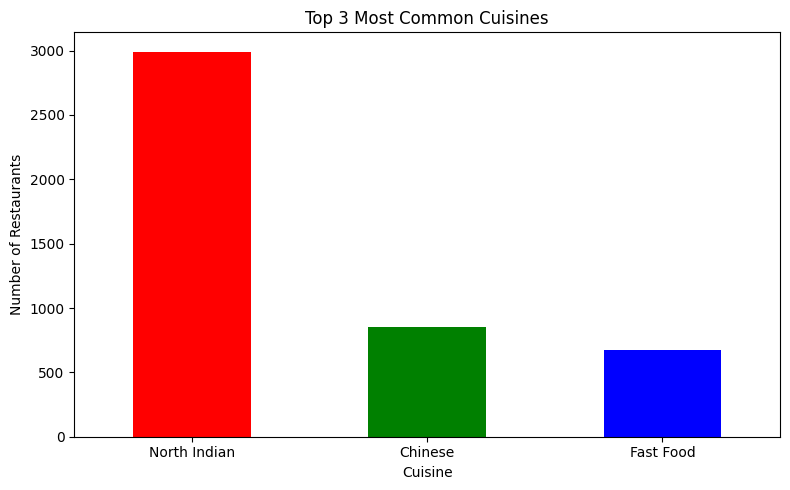

In [4]:
# Clean 'Cuisines' Column
df_cuisines = df.dropna(subset=['Cuisines']).copy()
df_cuisines['Cuisines'] = df_cuisines['Cuisines'].str.split(',').str[0]

# Calculate top 3 cuisines
top_cuisines = df_cuisines['Cuisines'].value_counts().head(3)

# Calculate percentages
total_restaurants = len(df_cuisines)
percentages = (top_cuisines / total_restaurants) * 100

# Print results
print("Top 3 Most Common Cuisines:")
print(top_cuisines)
print("\nPercentages:")
print(percentages.round(2))

# Plot
plt.figure(figsize=(8,5))
top_cuisines.plot(kind='bar', color=['red','green','blue'])
plt.title('Top 3 Most Common Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**TASK 2: City Analysis**

City with Highest Number of Restaurants: New Delhi
City with Highest Average Rating: Inner City

Average Ratings by City:
City
Abu Dhabi          4.30
Agra               3.96
Ahmedabad          4.16
Albany             3.56
Allahabad          3.40
                   ... 
Weirton            3.90
Wellington City    4.25
Winchester Bay     3.20
Yorkton            3.30
��stanbul          4.29
Name: Aggregate rating, Length: 141, dtype: float64


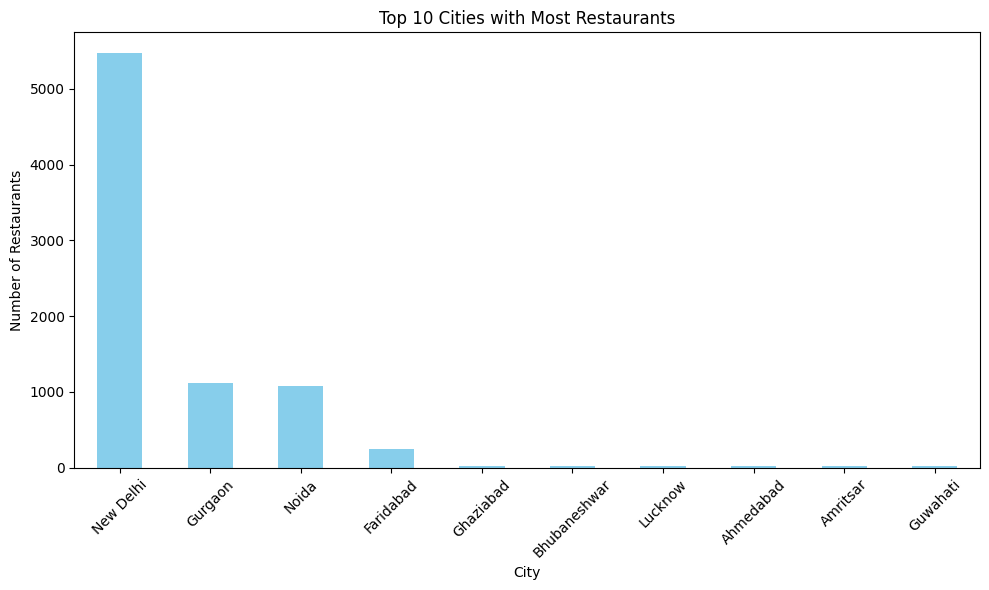

In [5]:
# Drop NA from relevant columns
df_city = df.dropna(subset=['City', 'Aggregate rating']).copy()

# City with highest number of restaurants
city_counts = df_city['City'].value_counts()
print("City with Highest Number of Restaurants:", city_counts.idxmax())

# Average rating per city
avg_rating_city = df_city.groupby('City')['Aggregate rating'].mean()

# City with highest average rating
print("City with Highest Average Rating:", avg_rating_city.idxmax())

# Print average ratings
print("\nAverage Ratings by City:")
print(avg_rating_city.round(2))

#Top 10 Cities with Most Restaurants
plt.figure(figsize=(10,6))
city_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities with Most Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**TASK 3: Price Range Distribution**

Price Range Distribution:
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

Percentages:
Price range
1    46.53
2    32.59
3    14.74
4     6.14
Name: count, dtype: float64


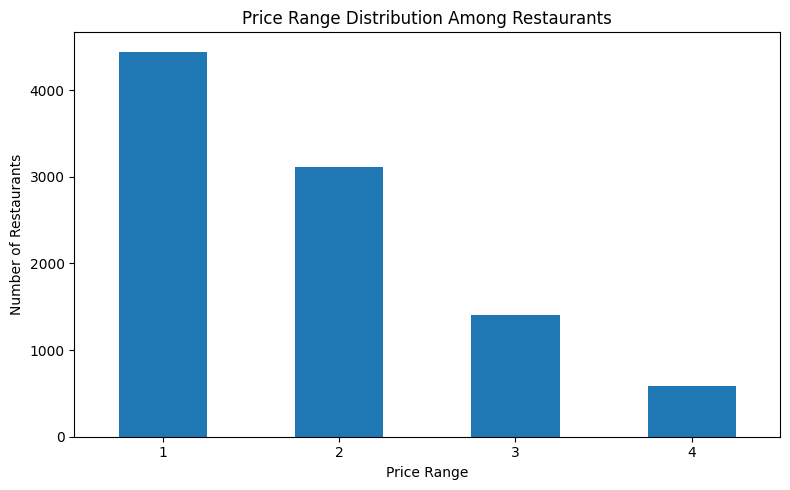

In [6]:
# Drop NA in Price range
df_price = df.dropna(subset=['Price range']).copy()

# Distribution counts
price_counts = df_price['Price range'].value_counts().sort_index()

# Percentage calculation
total_restaurants = len(df_price)
price_percentages = (price_counts / total_restaurants) * 100

print("Price Range Distribution:")
print(price_counts)
print("\nPercentages:")
print(price_percentages.round(2))

# Plot histogram
plt.figure(figsize=(8,5))
price_counts.plot(kind='bar')
plt.title('Price Range Distribution Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**TASK 4: Online Delivery**

Percentage of Restaurants Offering Online Delivery: 25.66%

Average rating (Online Delivery): 3.25
Average rating (No Online Delivery): 2.47


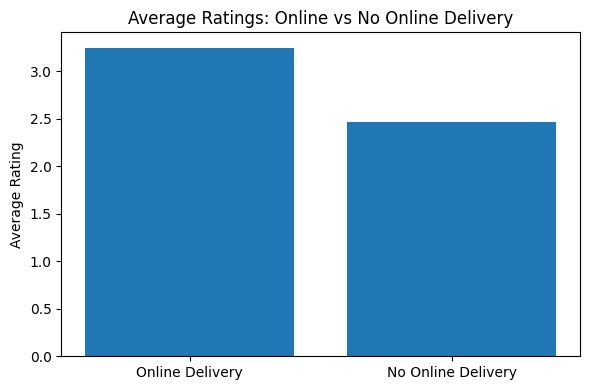

In [7]:
# Drop NA in Online Delivery and Aggregate rating
df_online = df.dropna(subset=['Has Online delivery', 'Aggregate rating']).copy()

# Convert Yes/No to boolean
df_online['Has Online delivery'] = df_online['Has Online delivery'].map({'Yes': True, 'No': False})

# Percentage offering online delivery
online_pct = df_online['Has Online delivery'].mean() * 100
print(f"Percentage of Restaurants Offering Online Delivery: {online_pct:.2f}%")

# Compare average ratings
avg_rating_online = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
avg_rating_offline = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()
print(f"\nAverage rating (Online Delivery): {avg_rating_online:.2f}")
print(f"Average rating (No Online Delivery): {avg_rating_offline:.2f}")

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(['Online Delivery', 'No Online Delivery'],
        [avg_rating_online, avg_rating_offline])
plt.title('Average Ratings: Online vs No Online Delivery')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()